In [1]:
import numpy as np
import seaborn as sns

Based on write-up here: [link](https://mattferraro.dev/posts/poissons-equation)

## Dirichlet boundary conditions

In [2]:
size = 100
max_iter = 1000

def start_state(side_val=1):
    mat = np.zeros((size, size)).astype(float)
    mat[:,-1]=side_val
    return mat

def update(mat):
    new_mat = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if i == 0 or i == size-1 \
            or j == 0 or j == size-1:
                new_mat[i,j]=mat[i,j]
            else:
                new_mat[i,j]= 1/4 * (
                    mat[i-1,j] + mat[i+1,j] + mat[i,j-1] + mat[i,j+1]
                )
    return new_mat

def update_inplace(mat):
    for i in range(size):
        for j in range(size):
            if not (i == 0 or i == size-1 \
            or j == 0 or j == size-1):
                mat[i,j]= 1/4 * (
                    mat[i-1,j] + mat[i+1,j] + mat[i,j-1] + mat[i,j+1]
                )
    return mat

def make_pass(mat, func, rounds):
    for i in range(rounds):
        old_mat = mat.copy()
        mat = func(mat)
        if np.all(mat == old_mat):
            print(f"convergence reached at round {i}")
            break
    return mat

In [3]:
#declaring start states

matrix_1 = start_state()
matrix_2 = start_state()

In [4]:
matrix_1 = make_pass(matrix_1, update, max_iter)

In [5]:
matrix_2 = make_pass(matrix_2, update_inplace, max_iter)

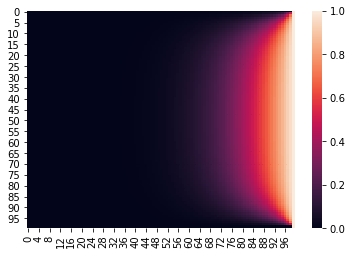

In [6]:
sns.heatmap(matrix_1)

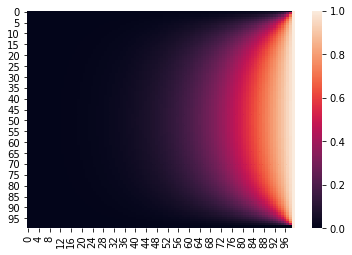

In [7]:
sns.heatmap(matrix_2)

## Neumann boundary conditions

In [8]:
def update_neumann(mat, h):
    for i in range(size):
        for j in range(size):
            # boundary check
            if i == 0: i_up = i+1
            else: i_up = i-1
            if i == size-1: i_down = i-1
            else: i_down = i+1
            if j == 0: j_left = j+1
            else: j_left = j-1
            if j == size-1: j_right = j-1
            else: j_right = j+1
            # update
            delta = mat[i_up, j] + mat[i_down, j] + \
                    mat[i, j_left] + mat[i, j_right] - \
                    4.*mat[i,j] + h[i,j]
            mat[i,j] += 1.94*delta/4.
    return mat

In [36]:
matrix = start_state(0)
h = start_state(0)

h[30,25]=-5
h[10,70]=5
h[65,56]=-7
h[80,35]=10

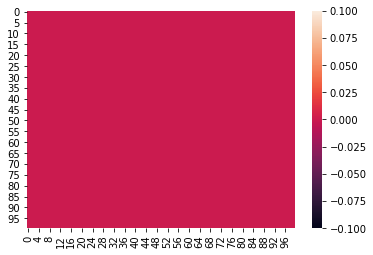

In [37]:
sns.heatmap(matrix)

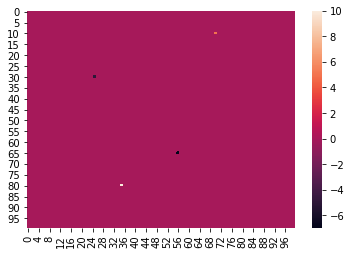

In [38]:
sns.heatmap(h)

In [39]:
matrix = make_pass(matrix, lambda x: update_neumann(x, h), max_iter)

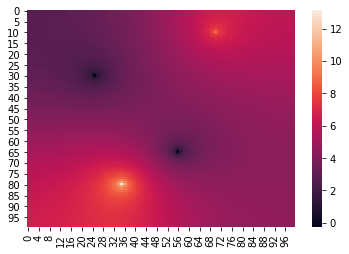

In [40]:
sns.heatmap(matrix)

## 3D visualization

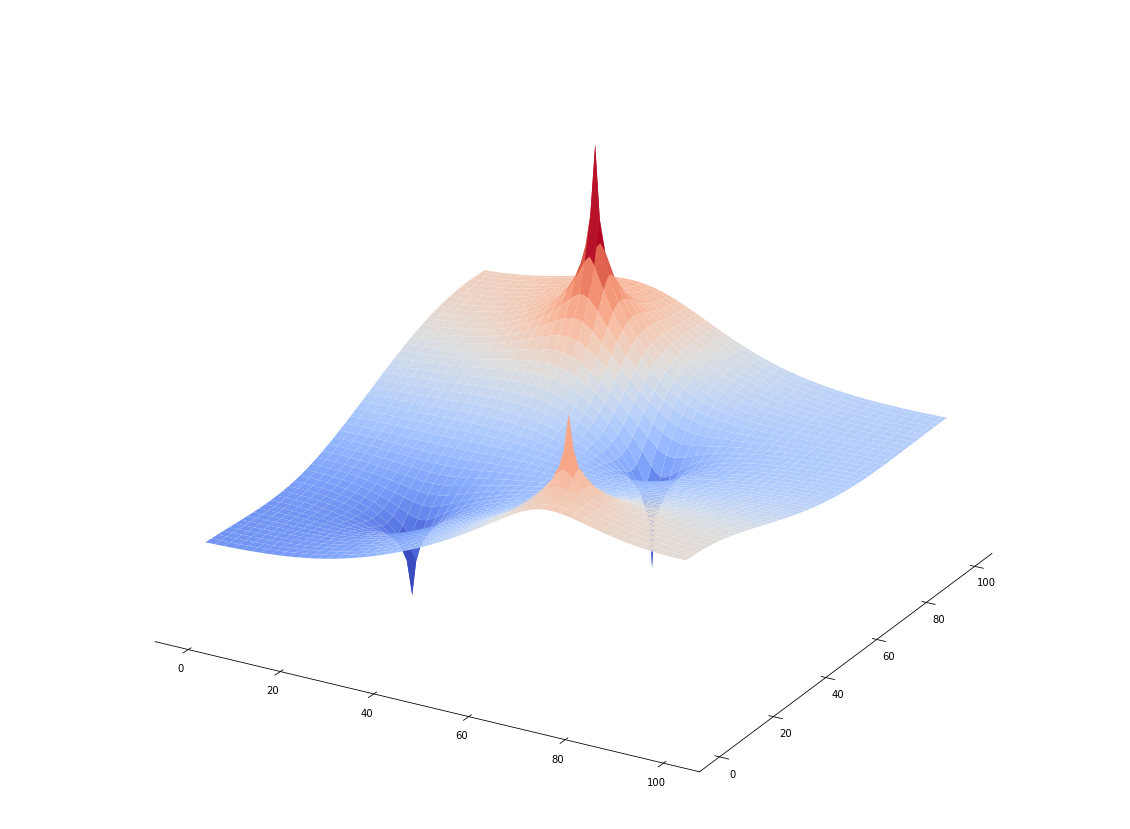

In [41]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Create figure and add axis
fig = plt.figure(figsize=(20, 15))
ax = plt.subplot(111, projection='3d')

# Remove gray panes and axis grid
ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)
# Remove z-axis
ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])

# Create meshgrid
X, Y = np.meshgrid(np.linspace(0, 100, len(matrix)), np.linspace(0, 100, len(matrix)))
# Plot surface
plot = ax.plot_surface(X=X, Y=Y, Z=matrix, cmap=cm.coolwarm)